In [60]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import librosa
from IPython.display import Audio
from IPython import display


## Read embeddings and metadata file

In [61]:
unlabeled_path = "/home/wetdog/orcaal/preprocess/unlabeled_test_cpu/"
img_path = f"{unlabeled_path}/spectrograms/"


folder_name = os.path.basename(unlabeled_path[:-1])

# read csv file with embeddings 
embeddings_file = os.path.join(unlabeled_path, folder_name + '_embeddings.csv')
df = pd.read_csv(embeddings_file,index_col=0)
# filename column without extension
df['filename'] = df.apply(lambda x: x['filename'][:-4],axis=1)

# read metadata file
df_metadata = pd.read_csv(f"{unlabeled_path}/metadata.tsv",sep='\t')
# filename column without extension
df_metadata['filename'] = df_metadata.apply(lambda x: x['audio_path'].split('/')[-1][:-4],axis=1)

df_merged = df.merge(df_metadata, how='left',on='filename')
#df_merged.to_csv('metadata_' + folder_name + '.tsv',sep='\t',index=False)

embedding_cols = [str(i) for i in range(0,1024)]
df_merged.sort_values(by='predicted_value')
# uncertainty
df_merged['uncertainity'] = 0.5 - df_merged['predicted_value']

## Histogram of values

$Uncertainity = 1 - p(y*|x)$ considering only the positive class. In a binary classifier logits close to 0.5 are the most uncertain for the model.

then 

$most{}uncertain = Min [abs(0.5 - p(y*|x))]$ 

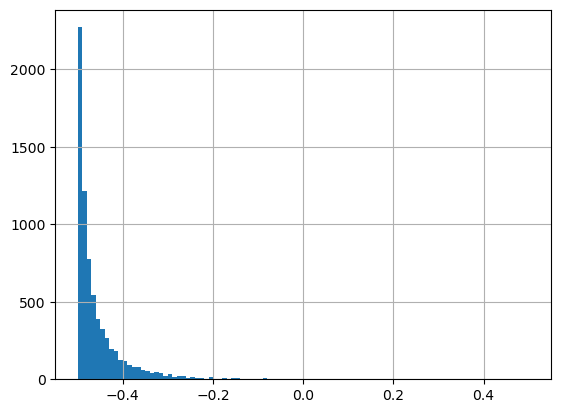

In [62]:
df_merged['uncertainity'].hist(bins=100)
plt.show()

$Representativeness = \frac{1}{U}\sum_{u=1}^{U}{Sim(x,x^{U})}$

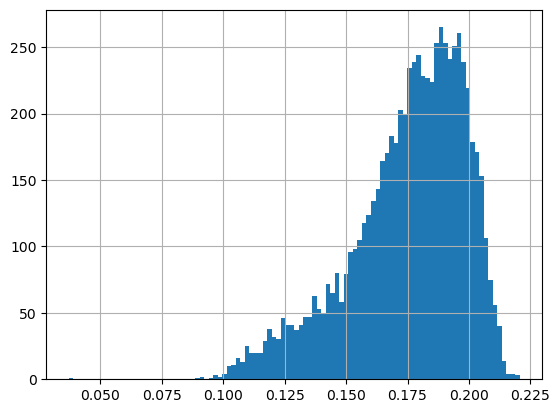

In [63]:
df_merged['representativeness_x'].hist(bins=100)
plt.show()

## Dimensionality reduction of embeddings

In [64]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=30)
projected_embeddings = tsne.fit_transform(df_merged[embedding_cols])



In [65]:
df_merged['x'] = projected_embeddings[:,0]
df_merged['y'] = projected_embeddings[:,1]

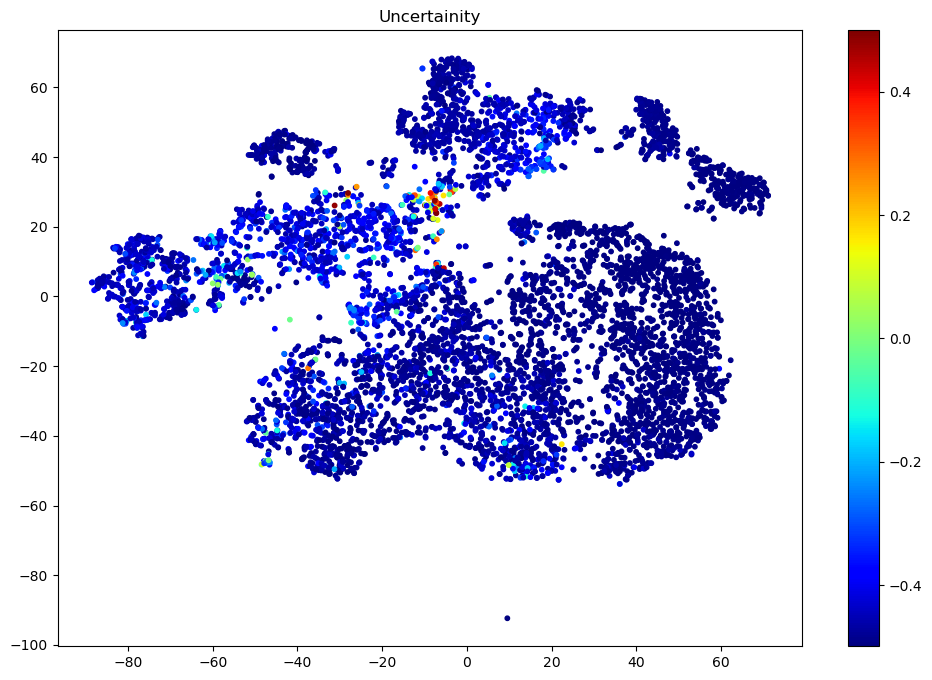

In [66]:
plt.figure(figsize=(12,8))
plt.scatter(projected_embeddings[:,0],projected_embeddings[:,1],c=df_merged['uncertainity'].values,cmap='jet',s=10)
plt.colorbar()
plt.title('Uncertainity')
plt.show()


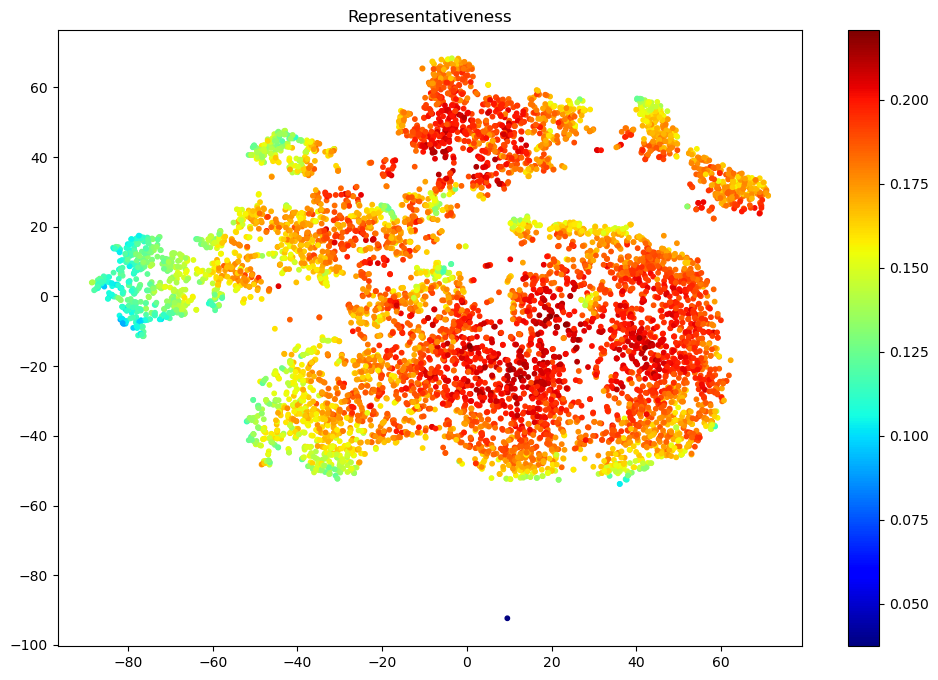

In [67]:
plt.figure(figsize=(12,8))
plt.scatter(projected_embeddings[:,0],projected_embeddings[:,1],c=df_merged['representativeness_x'].values,cmap='jet',s=10)
plt.colorbar()
plt.title('Representativeness')
plt.show()

In [68]:
df_merged['i_den'] = df_merged['representativeness_x']*df_merged['uncertainity']

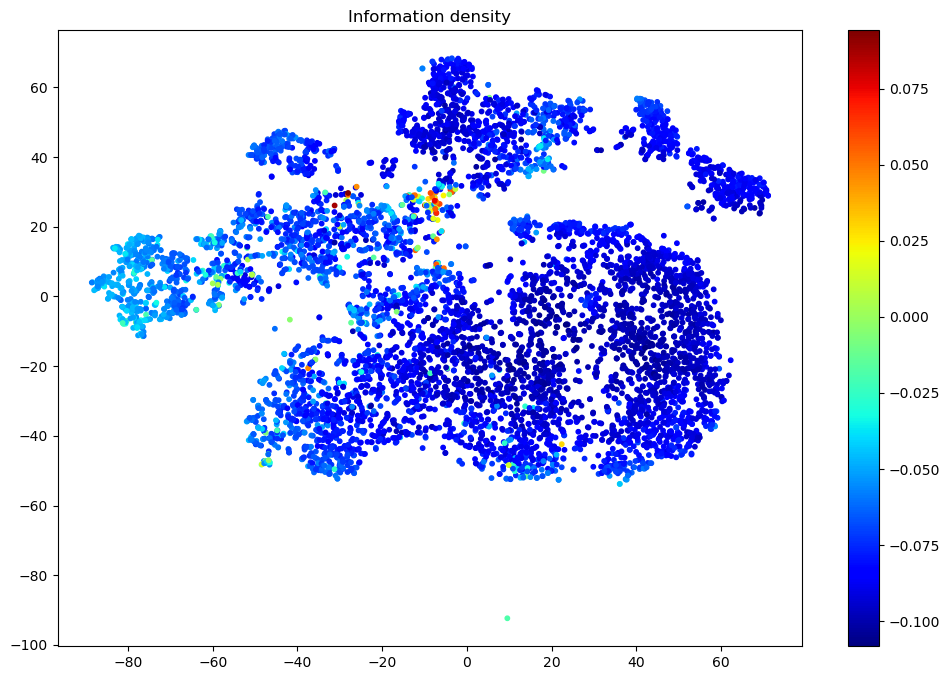

In [69]:
plt.figure(figsize=(12,8))
plt.scatter(projected_embeddings[:,0],projected_embeddings[:,1],c=df_merged['i_den'].values,cmap='jet',s=10)
plt.colorbar()
plt.title('Information density')
plt.show()

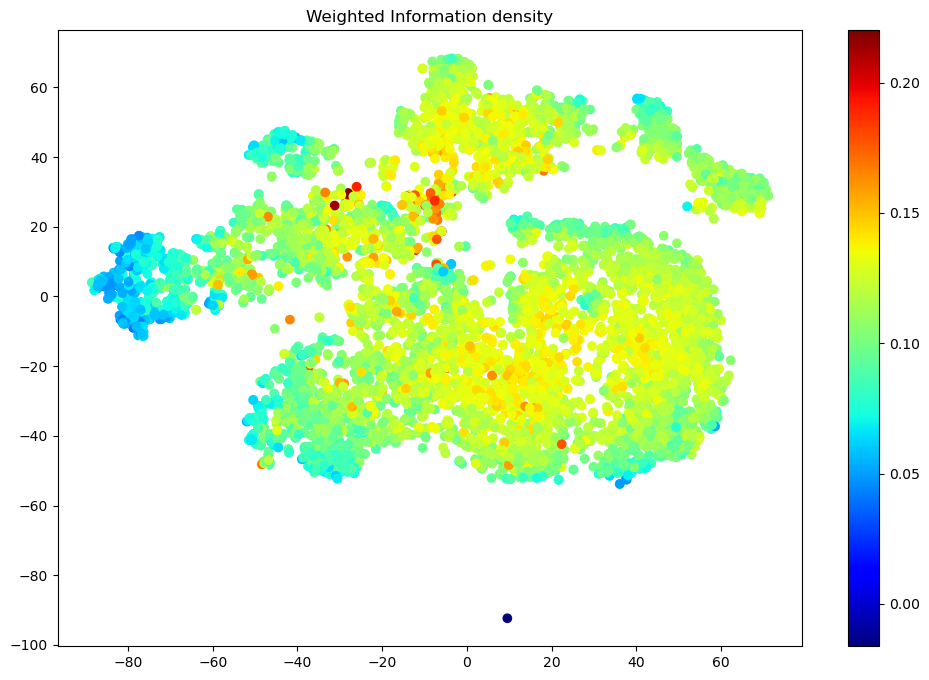

In [70]:
plt.figure(figsize=(12,8))
df_merged['w_den'] = 0.9*df_merged['representativeness_x'] + df_merged['uncertainity']*0.1
plt.scatter(projected_embeddings[:,0],projected_embeddings[:,1],c=df_merged['w_den'].values,cmap='jet')
plt.colorbar()
plt.title('Weighted Information density')
plt.show()

In [71]:
for clip in df_merged.sort_values(by='predicted_value').iloc[:10,:]['audio_path'].values:
    clip = clip.replace('/spectrograms/','/')
    data,fs = librosa.core.load(clip)
    display.display(Audio(data=data,rate=fs))

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [72]:
unlabeled_path = "/home/wetdog/orcaal/preprocess/unlabeled_july/"
img_path = f"{unlabeled_path}/spectrograms/"


folder_name = os.path.basename(unlabeled_path[:-1])

# read csv file with embeddings 
embeddings_file = os.path.join(unlabeled_path, folder_name + '_embeddings.csv')
df = pd.read_csv(embeddings_file,index_col=0)
# filename column without extension
df['filename'] = df.apply(lambda x: x['filename'][:-4],axis=1)

# read metadata file
df_metadata = pd.read_csv(f"{unlabeled_path}/metadata.tsv",sep='\t')
# filename column without extension
df_metadata['filename'] = df_metadata.apply(lambda x: x['audio_path'].split('/')[-1][:-4],axis=1)

df_merged = df.merge(df_metadata, how='left',on='filename')
#df_merged.to_csv('metadata_' + folder_name + '.tsv',sep='\t',index=False)

embedding_cols = [str(i) for i in range(0,1024)]
df_merged.sort_values(by='predicted_value')
# uncertainty
df_merged['uncertainity'] = 0.5 - df_merged['predicted_value'] 

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=30)
projected_embeddings = tsne.fit_transform(df_merged[embedding_cols])



In [73]:
df_merged['x'] = projected_embeddings[:,0]
df_merged['y'] = projected_embeddings[:,1]

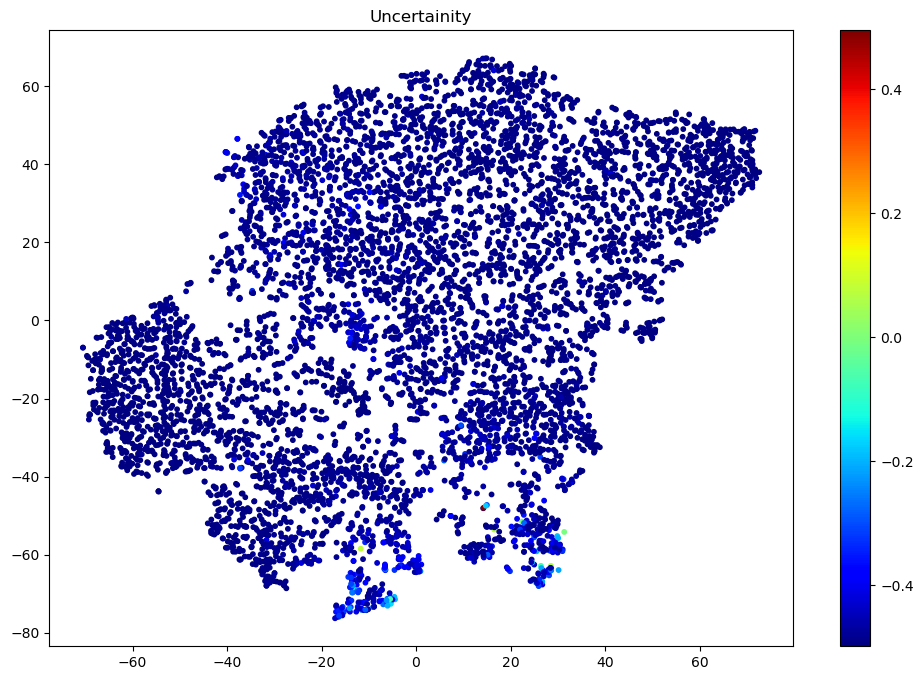

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(projected_embeddings[:,0],projected_embeddings[:,1],c=df_merged['uncertainity'].values,cmap='jet',s=10)
plt.colorbar()
plt.title('Uncertainity')
plt.show()

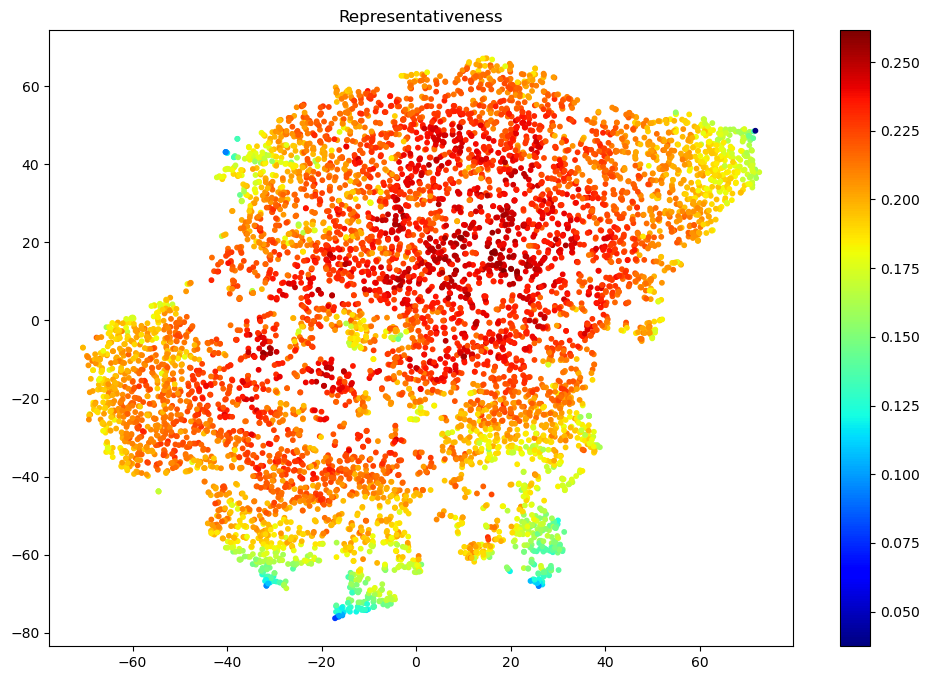

In [75]:
plt.figure(figsize=(12,8))
plt.scatter(projected_embeddings[:,0],projected_embeddings[:,1],c=df_merged['representativeness_x'].values,cmap='jet',s=10)
plt.colorbar()
plt.title('Representativeness')
plt.show()

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/wetdog/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


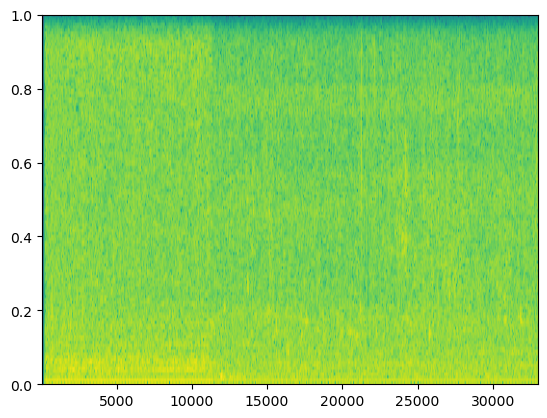

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


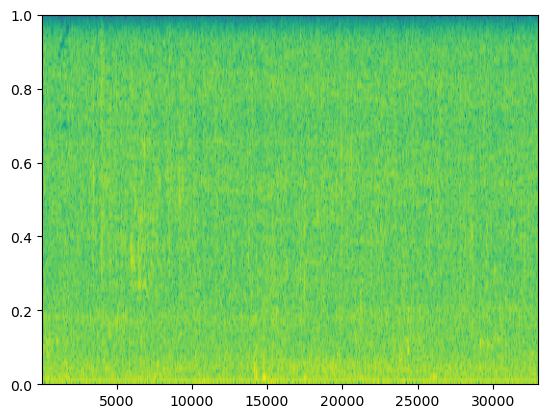

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/wetdog/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


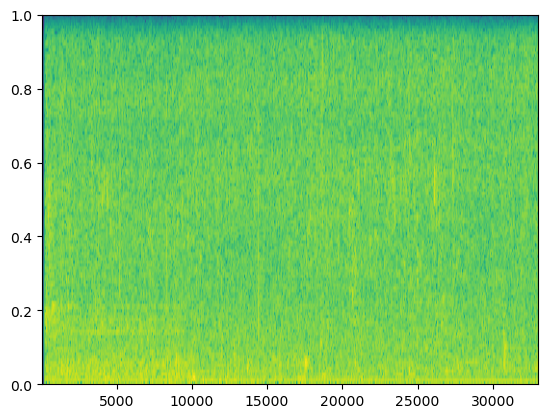

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/wetdog/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


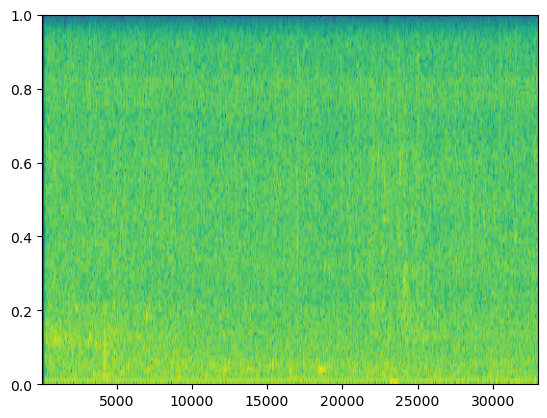

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/wetdog/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


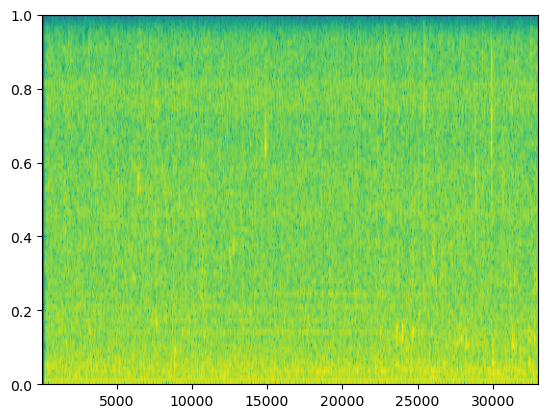

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/wetdog/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


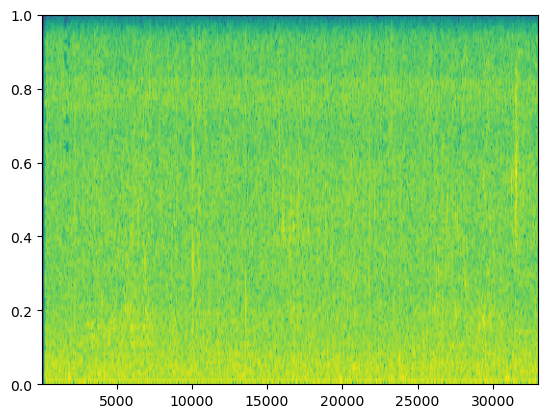

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/wetdog/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


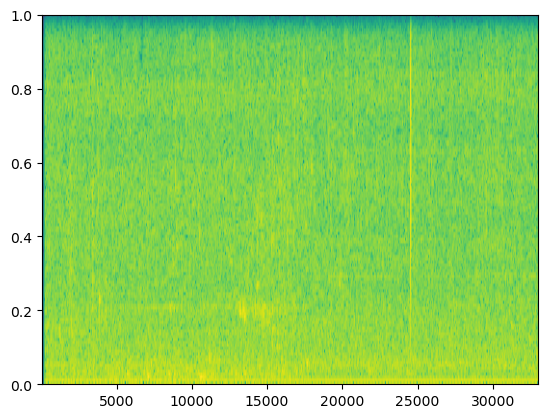

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/wetdog/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


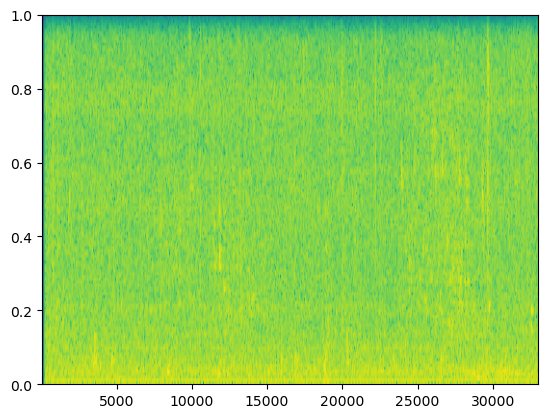

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/wetdog/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


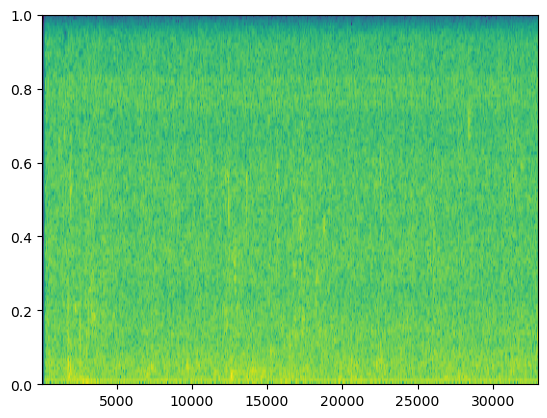

/home/wetdog/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


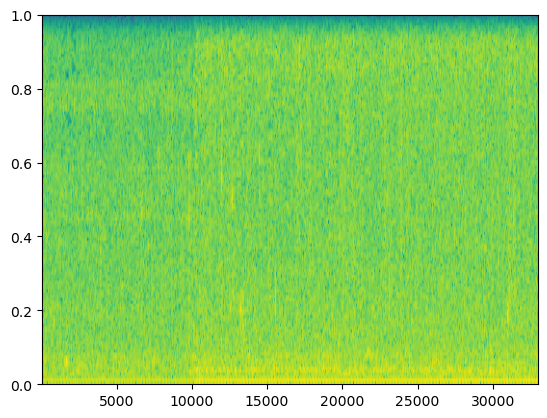

In [86]:
for clip in df_merged.sort_values(by='representativeness_x',ascending=False).iloc[:10,:]['audio_path'].values:
    clip = clip.replace('/spectrograms/','/')
    data,fs = librosa.core.load(clip)
    plt.specgram(data)
    plt.show()
    display.display(Audio(data=data,rate=fs))
    


In [78]:
df_merged.sort_values(by='',ascending=False).iloc[:10,:]

0       1       2       3       4    5       6       7       8  \
5938  0.0000  0.0674  0.0037  0.0000  0.0000  0.0  0.0000  0.0274  0.0000   
1395  0.0079  0.0000  0.0019  0.0017  0.0015  0.0  0.0000  0.0436  0.0000   
5978  0.1652  0.0015  0.0000  0.0281  0.1216  0.0  0.0013  0.0796  0.0234   
6937  0.0000  0.0026  0.0000  0.0000  0.0011  0.0  0.0000  0.0440  0.0000   
4129  0.0000  0.1201  0.0000  0.0000  0.0000  0.0  0.0000  0.0206  0.0000   
716   0.0559  0.0235  0.0000  0.0270  0.0498  0.0  0.0000  0.1827  0.0101   
3204  0.0000  0.0846  0.0102  0.0000  0.0000  0.0  0.0000  0.0000  0.0000   
1166  0.0000  0.0929  0.0020  0.0000  0.0016  0.0  0.0000  0.0068  0.0000   
6683  0.0000  0.1050  0.0000  0.0000  0.0000  0.0  0.0000  0.0245  0.0000   
5807  0.0000  0.1544  0.0049  0.0000  0.0000  0.0  0.0000  0.0000  0.0000   

           9  ...  representativeness_x  predicted_value  \
5938  0.0027  ...              0.214106         0.998673   
1395  0.0000  ...              0.159275         0.998648   
5978  0.0474  ...              0.145896         0.998595   
6937  0.0000  ...              0.233442         0.998547   
4129  0.0000  ...              0.229414         0.998454   
716   0.0070  ...              0.184514         0.998418   
3204  0.0000  ...              0.189462         0.998406   
1166  0.0000  ...              0.233555         0.998376   
6683  0.0000  ...              0.241368         0.998343   
5807  0.0000  ...              0.196145         0.998269   

                                             audio_path  representativeness_y  \
5938  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.214106   
1395  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.159275   
5978  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.145896   
6937  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.233442   
4129  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.229414   
716   /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.184514   
3204  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.189462   
1166  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.233555   
6683  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.241368   
5807  /home/wetdog/orcaal/preprocess/unlabeled_july/...              0.196145   

         location  duration            timestamp  uncertainity          x  \
5938  Haro Strait         3  2021-07-05 00:52:37     -0.498673  34.260971   
1395  Haro Strait         3  2021-07-04 23:10:01     -0.498648  71.788025   
5978  Haro Strait         3  2021-07-04 21:36:43     -0.498595  70.397217   
6937  Haro Strait         3  2021-07-05 01:40:40     -0.498547  26.160742   
4129  Haro Strait         3  2021-07-05 03:29:07     -0.498454  44.438042   
716   Haro Strait         3  2021-07-05 02:35:46     -0.498418  64.753586   
3204  Haro Strait         3  2021-07-05 00:38:43     -0.498406 -62.394604   
1166  Haro Strait         3  2021-07-05 01:04:07     -0.498376 -38.046185   
6683  Haro Strait         3  2021-07-05 03:23:07     -0.498343  26.028074   
5807  Haro Strait         3  2021-07-05 00:38:40     -0.498269 -64.469856   

              y  
5938  38.927979  
1395  38.658310  
5978  47.245022  
6937  46.814583  
4129   4.331158  
716   42.115963  
3204  -7.776930  
1166  -4.968029  
6683  24.499311  
5807 -23.067715  

[10 rows x 1035 columns]

In [ ]:
df_merged